<a href="https://colab.research.google.com/github/Minikhil/Twitter-Stock-Sentiment-Analyzer/blob/main/TwitterStockSentimentAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Project 

In [ ]:
#used to access API
import tweepy
#used for sentiment analyzes 
from textblob import TextBlob
#used to create word cloud
from wordcloud import WordCloud
#analyze data 
import pandas as pd
#math operations
import numpy as np
#suports regular exp
import re 
#used to plot graphs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#df = pd.read_excel("/content/sample_data/california_housing_test.csv")
from google.colab import files
uploaded = files.upload()

Saving twitterSentimentPythonKeys.xlsx to twitterSentimentPythonKeys.xlsx


In [ ]:
log = pd.read_excel('twitterSentimentPythonKeys.xlsx')
log
consumerKey = log['API Key'][0]
consumerSecretKey = log['API Secret Key'][0]
accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]


In [ ]:
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecretKey)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True )

In [ ]:
#posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode="extended")
global ticker
def runA(t):
  print(t)
ticker = '$DDD'
#result_type='popular'
posts = api.search(q= ticker, count = 100, lang = "en", tweet_mode="extended") 
#result = [[msg.full_text] for msg in posts]
result = [[msg.full_text] for msg in posts]
print(len(result))

100


In [ ]:
#Create a dataframe with column Tweets
global df 
df = pd.DataFrame([msg.full_text for msg in posts], columns = ['Tweets'])
#prints top 5
#df.head()
df 

,Tweets
0,$DDD (Daily)\nBlew earnings out of the water. ...
1,#AI 1-2 Week Bullish Stocks\n\n$LAC : 96.78%\n...
2,WeeklyUp10\n$AA $45.15 1.10% 16.52% 26.75% 10....
3,Top tweeted stocks:\n$PLTR $AAPL $TSLA $UPST $...
4,RT @TradeWithTechs: $XONE buyout is a big deal...
...,...
95,WeeklyUp10\n$AA $44.39 -0.60% 14.55% 24.62% 8....
96,$ALIT is the sort of stock you can buy and kee...
97,$DDD - Had really nice earnings and made a hug...
98,#DDD - Midweek Watch 8/11 - $DDD LONG - Tradin...


In [ ]:
#Clean the text 


#Create a function to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+' ,'', text) # Remove @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link
  return text

  # Cleaning the text 
df['Tweets'] = df['Tweets'].apply(cleanText)

#show cleaned text 
df



,Tweets
0,$DDD (Daily)\nBlew earnings out of the water. ...
1,AI 1-2 Week Bullish Stocks\n\n$LAC : 96.78%\n$...
2,WeeklyUp10\n$AA $45.15 1.10% 16.52% 26.75% 10....
3,Top tweeted stocks:\n$PLTR $AAPL $TSLA $UPST $...
4,: $XONE buyout is a big deal for 3D printing s...
...,...
95,WeeklyUp10\n$AA $44.39 -0.60% 14.55% 24.62% 8....
96,$ALIT is the sort of stock you can buy and kee...
97,$DDD - Had really nice earnings and made a hug...
98,DDD - Midweek Watch 8/11 - $DDD LONG - Trading...


In [ ]:
#polarity: negative vs. positive    (-1.0 => +1.0)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 

#subjectivity: objective vs. subjective (+0.0 => +1.0)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df





,Tweets,Subjectivity,Polarity
0,$DDD (Daily)\nBlew earnings out of the water. ...,0.033333,0.000000
1,AI 1-2 Week Bullish Stocks\n\n$LAC : 96.78%\n$...,0.000000,0.000000
2,WeeklyUp10\n$AA $45.15 1.10% 16.52% 26.75% 10....,0.000000,0.000000
3,Top tweeted stocks:\n$PLTR $AAPL $TSLA $UPST $...,0.500000,0.250000
4,: $XONE buyout is a big deal for 3D printing s...,0.100000,-0.100000
...,...,...,...
95,WeeklyUp10\n$AA $44.39 -0.60% 14.55% 24.62% 8....,0.000000,0.000000
96,$ALIT is the sort of stock you can buy and kee...,0.600000,-0.033333
97,$DDD - Had really nice earnings and made a hug...,0.766667,0.316667
98,DDD - Midweek Watch 8/11 - $DDD LONG - Trading...,0.400000,-0.050000


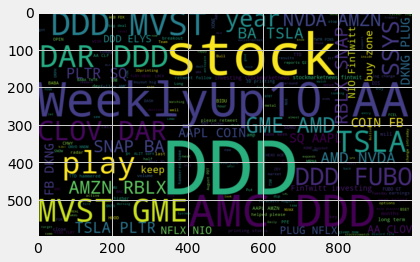

In [ ]:
# Plot Word Cloud 
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 1000, height = 600, random_state= 21, max_font_size = 200).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")

In [ ]:
#Compute negative, neutral, and positive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,$DDD (Daily)\nBlew earnings out of the water. ...,0.033333,0.000000,Neutral
1,AI 1-2 Week Bullish Stocks\n\n$LAC : 96.78%\n$...,0.000000,0.000000,Neutral
2,WeeklyUp10\n$AA $45.15 1.10% 16.52% 26.75% 10....,0.000000,0.000000,Neutral
3,Top tweeted stocks:\n$PLTR $AAPL $TSLA $UPST $...,0.500000,0.250000,Positive
4,: $XONE buyout is a big deal for 3D printing s...,0.100000,-0.100000,Negative
...,...,...,...,...
95,WeeklyUp10\n$AA $44.39 -0.60% 14.55% 24.62% 8....,0.000000,0.000000,Neutral
96,$ALIT is the sort of stock you can buy and kee...,0.600000,-0.033333,Negative
97,$DDD - Had really nice earnings and made a hug...,0.766667,0.316667,Positive
98,DDD - Midweek Watch 8/11 - $DDD LONG - Trading...,0.400000,-0.050000,Negative


In [ ]:
# sortedDF = df.sort_values(by=['Polarity'])
# sortedDF

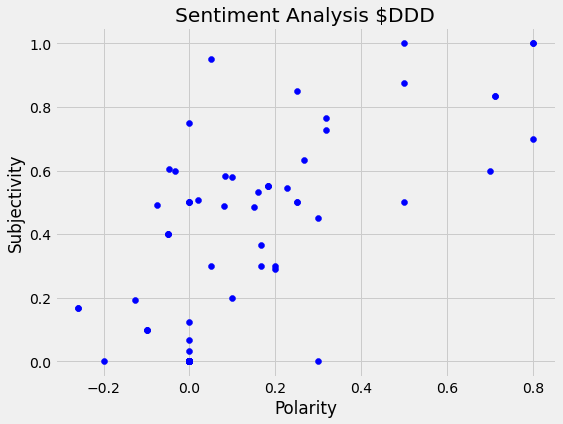

,Tweets,Subjectivity,Polarity,Analysis
0,$DDD (Daily)\nBlew earnings out of the water. ...,0.033333,0.000000,Neutral
1,AI 1-2 Week Bullish Stocks\n\n$LAC : 96.78%\n$...,0.000000,0.000000,Neutral
2,WeeklyUp10\n$AA $45.15 1.10% 16.52% 26.75% 10....,0.000000,0.000000,Neutral
3,Top tweeted stocks:\n$PLTR $AAPL $TSLA $UPST $...,0.500000,0.250000,Positive
4,: $XONE buyout is a big deal for 3D printing s...,0.100000,-0.100000,Negative
...,...,...,...,...
95,WeeklyUp10\n$AA $44.39 -0.60% 14.55% 24.62% 8....,0.000000,0.000000,Neutral
96,$ALIT is the sort of stock you can buy and kee...,0.600000,-0.033333,Negative
97,$DDD - Had really nice earnings and made a hug...,0.766667,0.316667,Positive
98,DDD - Midweek Watch 8/11 - $DDD LONG - Trading...,0.400000,-0.050000,Negative


In [ ]:
#@title
#plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis '+ ticker)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
df

In [ ]:
#@title
totalCount = len(df)
positiveTweets = df[df.Analysis == 'Positive']
negativeTweets = df[df.Analysis == 'Negative']
neutralTweets = df[df.Analysis == 'Neutral']

positivePercent = round(((len(positiveTweets))/totalCount*100),1)
negativePercent = round(((len(negativeTweets))/totalCount*100),1)
nneutralPercent = round(((len(neutralTweets))/totalCount*100),1)


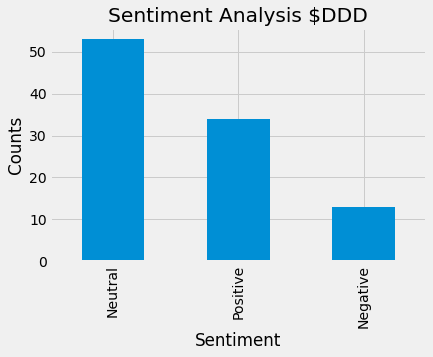

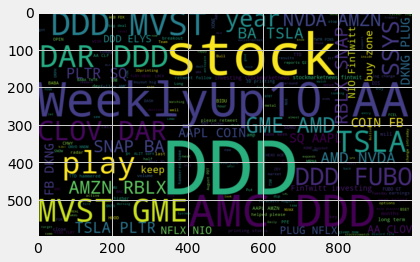

In [ ]:
#@title
df['Analysis'].value_counts()
plt.title('Sentiment Analysis ' + ticker)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')

plt.show()
plt.imshow(wordCloud, interpolation="bilinear")

In [ ]:
import os

os.mkdir('templates')
os.mkdir('static')

In [ ]:
# !pip install flask-ngrok
# !pip install WTForms
!pip install flask-wtf

In [ ]:
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok
from flask_wtf import FlaskForm
from wtforms import Form, StringField, PasswordField, validators
from wtforms.validators import DataRequired

app = Flask(__name__)
app.config['SECRET_KEY'] = "tothemoon"
run_with_ngrok(app)   

class TickerInput(FlaskForm):
  ticker = StringField('ticker', validators=[DataRequired()])

@app.route("/", methods =['GET', 'POST'])
def home():
    ticker = None
    form = TickerInput()
    form.validate()
    if form.validate_on_submit():
      ticker = form.ticker.data
      print("\nData received. Now redirecting ...")
      runA(ticker)
      return redirect(url_for('home'))
    return render_template('home.html', ticker = ticker, form = form)
    #return "<h1>Twitter Sentiment Analyzer</h1> </br> <form> <label for='ticker'> Ticker:</h3> </br> <input type='text' id='ticker' name = 'ticker'></form>"

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5400df4b27f2.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [12/Aug/2021 22:57:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 22:57:27] "GET /js/bootstrap.min.js HTTP/1.1" 404 -
127.0.0.1 - - [12/Aug/2021 22:57:27] "GET /css/bootstrap.min.css HTTP/1.1" 404 -
127.0.0.1 - - [12/Aug/2021 22:57:27] "GET /js/bootstrap.min.js HTTP/1.1" 404 -
127.0.0.1 - - [12/Aug/2021 22:57:27] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [12/Aug/2021 22:57:30] "GET /?ticker=%24HOOD HTTP/1.1" 200 -
127.0.0.1 - - [12/Aug/2021 22:57:30] "GET /css/bootstrap.min.css HTTP/1.1" 404 -
127.0.0.1 - - [12/Aug/2021 22:57:30] "GET /js/bootstrap.min.js HTTP/1.1" 404 -
